In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_pr(paths, labels, lines):
    plt.figure(figsize=(10, 4), tight_layout=True)
    for path, label, line in zip(paths, labels, lines):
        pr_table = pd.read_csv('matrix/' + path + '/pr_table.csv')
        plt.subplot(1, 2, 1)
        plt.plot(pr_table['conf'], pr_table['p'], line, label=label, linewidth=2)

        plt.subplot(1, 2, 2)
        plt.plot(pr_table['conf'], pr_table['r'], line, label=label, linewidth=2)

    plt.subplot(1, 2, 1)
    plt.xlabel('Confidence')
    plt.ylabel('Precision')
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Confidence')
    plt.ylabel('Recall')
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.grid()
    plt.legend()

In [ ]:
paths = ['step3_m1', 'step3_2e_0_4', 'step3_2e_5_9', 'step3_2e_10_14', 'step3_2e_15_19']
labels = ['M1', 'M2e-1', 'M2e-2', 'M2e-3', 'M2e-4']
lines = ['--', '-', '-', '-', '-']

plot_pr(paths, labels, lines)

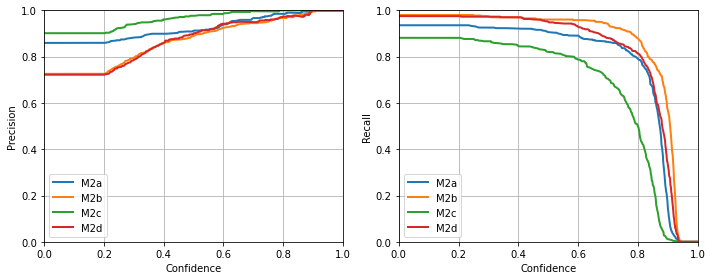

In [3]:
paths = ['step3_m2a', 'step3_m2b', 'step3_m2c', 'step3_m2d']
labels = ['M2a', 'M2b', 'M2c', 'M2d']
lines = ['-', '-', '-', '-']

plot_pr(paths, labels, lines)

In [2]:
import os
import numpy as np
import pandas as pd

def mAP(r, p):
    return -np.trapz(p, x=r)

print('name,mAP,recall')
for folder in os.listdir('test'):
    table = pd.read_csv('test/' + folder + '/table.csv')
    p = (table['tp']) / (table['tp'] + table['fp'] + 1e-10).to_numpy()
    r = table['tpr'].to_numpy()
    ap = mAP(r, p)
    print(folder + ',%.3f,%.3f'% (ap, r[0]))
    

name,mAP,recall
2a,0.575,0.635
2b,0.771,0.840
2c,0.628,0.650
2d,0.800,0.844
2e_0_4,0.703,0.789
2e_10_14,0.713,0.798
2e_15_19,0.681,0.763
2e_5_9,0.664,0.756
2f_0_4,0.584,0.630
2f_0_42,0.697,0.752
2f_0_4_0.3_0.8,0.688,0.741
2f_0_4_0.5_0.9,0.664,0.719
2f_10_14,0.684,0.756
2f_15_19,0.685,0.755
2f_15_19_new,0.684,0.764
2f_5_9,0.728,0.798
benedix-v3,0.667,0.764
benedix-v5l,0.686,0.762
benedix-v5m,0.690,0.767
benedix-v5s,0.688,0.774
combined-v3,0.746,0.843
combined-v5l,0.771,0.835
combined-v5m,0.751,0.820
combined-v5m-new,0.746,0.832
combined-v5s,0.750,0.838
combined-v5s-new,-0.000,0.000
global1-4,0.900,0.938
global1-v5m,0.885,0.931
global1-v5m-1,0.876,0.919
global1-v5m-1_lat30,0.840,0.884
global1-v5m-2,0.884,0.928
global1-v5m-2_lat30,0.857,0.897
global1-v5m-3,0.887,0.932
global1-v5m-3_lat30,0.849,0.890
global1-v5m-4,0.889,0.927
global1-v5m-4_lat30,0.861,0.898
global1-v5m_lat30,0.839,0.887
global2-3,0.918,0.955
global2-v5m,0.875,0.922
global2-v5m-2,0.889,0.931
global2-v5m-2_lat30,0.853,0.898


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def plots(folders, labels, lines=None):
    plt.figure(figsize=(10, 4), tight_layout=True)
    if lines == None:
        lines = ['-'] * len(folders)
    for folder, label, line in zip(folders, labels, lines):
        table = pd.read_csv('test/' + folder + '/table.csv')

        p = (table['tp'] + 1e-10) / (table['tp'] + table['fp'] + 1e-10)
        plt.subplot(1, 2, 1)
        plt.plot(table['conf'], p, line, label=label)

        plt.subplot(1, 2, 2)
        plt.plot(table['conf'], table['tpr'], line, label=label)

    plt.subplot(1, 2, 1)
    plt.xlabel('Confidence')
    plt.ylabel('Precision')
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Confidence')
    plt.ylabel('Recall')
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.grid()
    plt.legend()

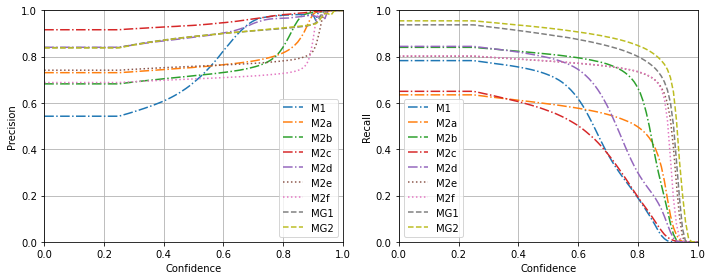

In [10]:
folders = ['m1', '2a', '2b', '2c', '2d', '2e_15_19', '2f_15_19', 'global1-4', 'global2-3']
labels = ['M1', 'M2a', 'M2b', 'M2c', 'M2d', 'M2e', 'M2f', 'MG1', 'MG2']
lines = ['-.'] * 5 + [':'] * 2 + ['--'] * 2
plots(folders, labels, lines)
plt.savefig('output.svg')

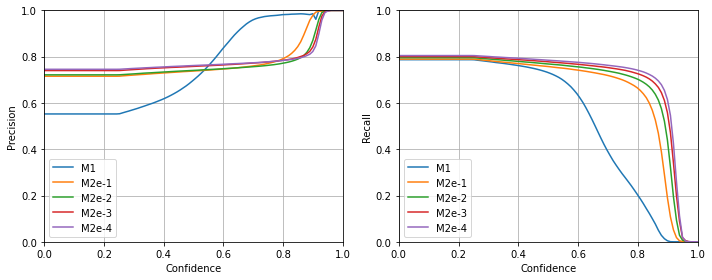

In [51]:
folders = ['m1', '2e_0_4', '2e_5_9', '2e_10_14', '2e_15_19']
labels = ['M1', 'M2e-1', 'M2e-2', 'M2e-3', 'M2e-4']
plots(folders, labels)

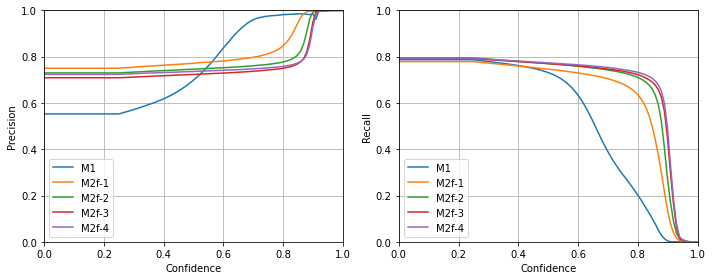

In [52]:
folders = ['m1', '2f_0_4', '2f_5_9', '2f_10_14', '2f_15_19']
labels = ['M1', 'M2f-1', 'M2f-2', 'M2f-3', 'M2f-4']
plots(folders, labels)

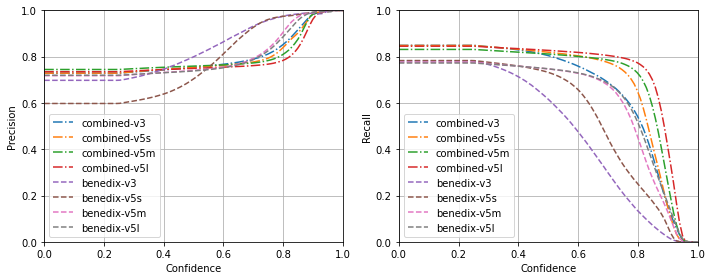

In [53]:
folders = ['combined-v3', 'combined-v5s', 'combined-v5m', 'combined-v5l', 'benedix-v3', 'benedix-v5s', 'benedix-v5m', 'benedix-v5l']
labels = folders
lines = ['-.'] * 4 + ['--'] * 4
plots(folders, labels, lines)

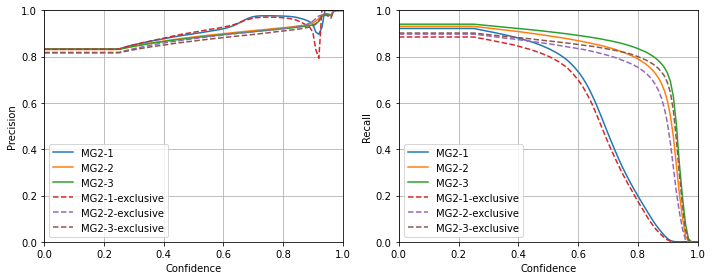

In [5]:
folders = ['global2-v5m', 'global2-v5m-2', 'global2-v5m-3', 'global2-v5m_lat30', 'global2-v5m-2_lat30', 'global2-v5m-3_lat30']
labels = ['MG2-1', 'MG2-2', 'MG2-3', 'MG2-1-exclusive', 'MG2-2-exclusive', 'MG2-3-exclusive']
lines = ['-'] * 3 + ['--'] * 3
plots(folders, labels, lines)